# Dataset Preview

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import plotly.express as px

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Basic overview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Dataset Basic Information
## Handle Missing Values

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Shape and columns
print("Shape of the dataset:", df.shape)
print("\nColumns:\n", df.columns)

# Data types and nulls
df.info()

Shape of the dataset: (8807, 12)

Columns:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Count of nulls
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

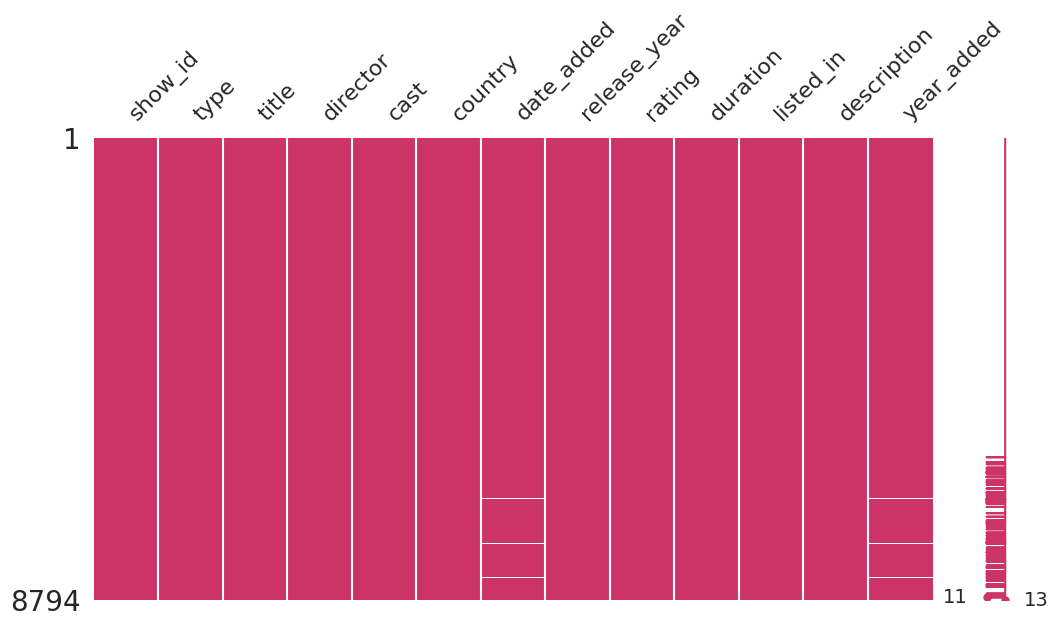

In [15]:
# Visualize missing data
import missingno as msno
msno.matrix(df, figsize=(12,6), color=(0.8, 0.2, 0.4))

# Optional: Drop rows with too many nulls or fill them
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Not Provided")
df['country'] = df['country'].fillna("Unknown")

In [16]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      88
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      88
dtype: int64

In [23]:
df.dropna(subset=['date_added'], inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df.dropna(subset=['duration'], inplace=True)

In [24]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

# Visualizations

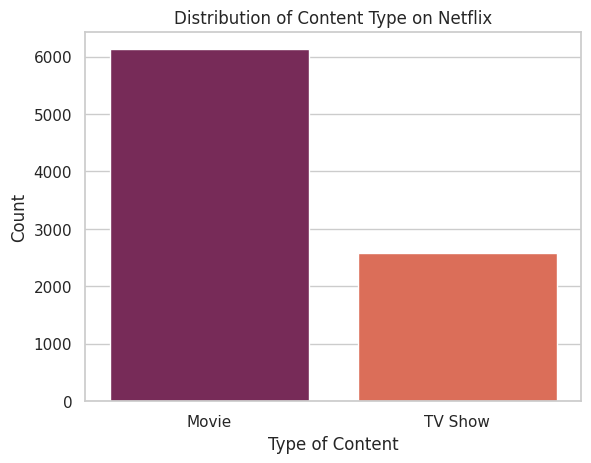

In [25]:
sns.countplot(data=df, x='type', palette='rocket')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

**Insight:** This tells that the movies are more popular on Netflix than the TV shows.

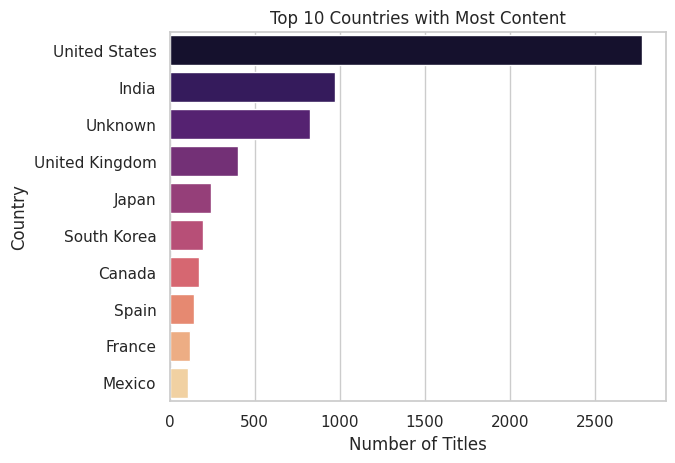

In [26]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette='magma')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The country with most content is US, followed by India.

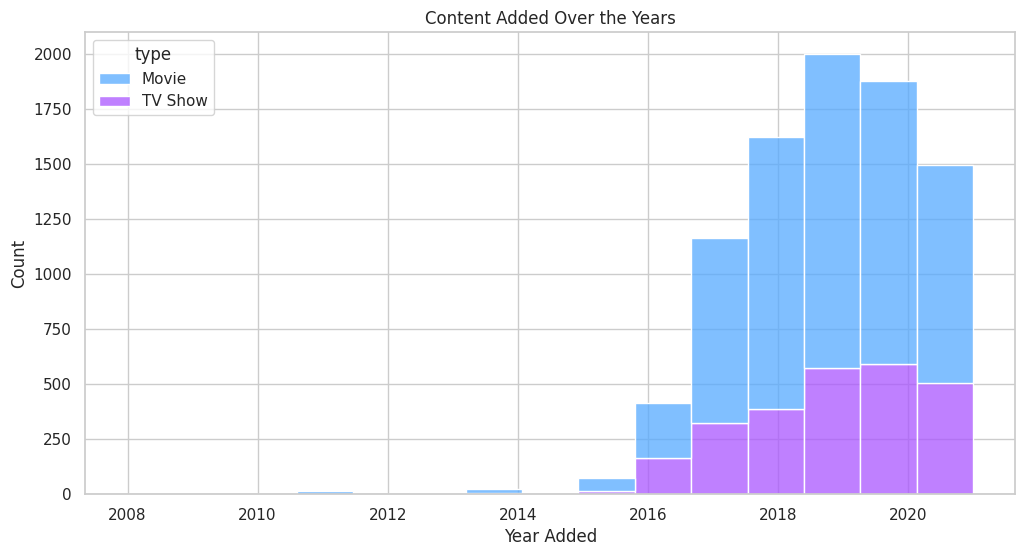

In [27]:
# Force re-convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', palette='cool', bins=15)
plt.title('Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

**Insight:** This shows how much content is being added over the past few years. It seems that movies and tv shows were on a surge prior to COVID, but after that, the year 2021 seems on a little low.

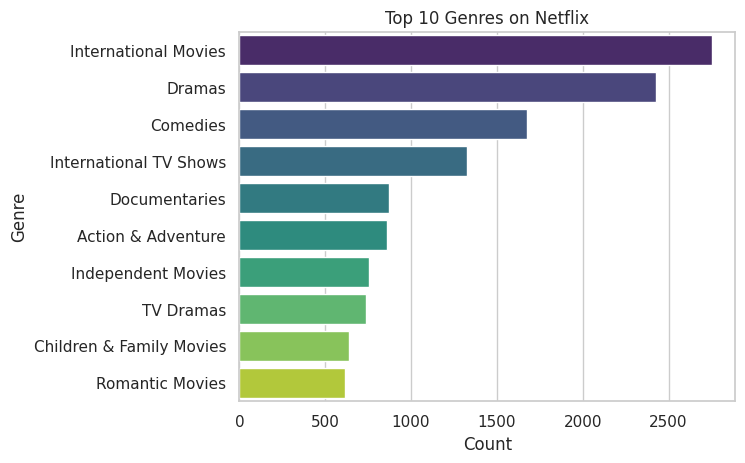

In [28]:
from collections import Counter

# Split and count genres
genres = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
top_genres = Counter(flat_genres).most_common(10)

# Plot
genre_names, genre_counts = zip(*top_genres)

sns.barplot(x=list(genre_counts), y=list(genre_names), palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:** International Movies followed by Dramas and Comedies are the most popular genres on Netflix.

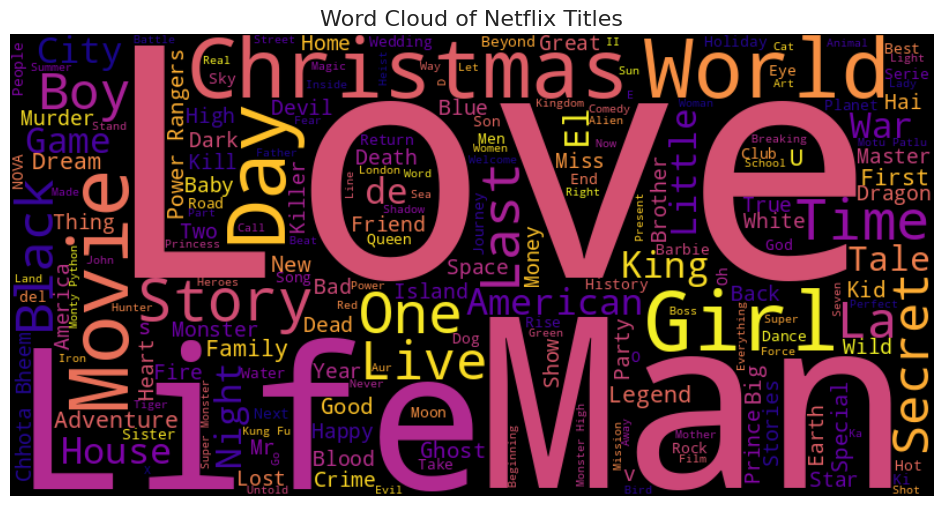

In [29]:
text = ' '.join(df['title'])

wc = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles', fontsize=16)
plt.show()

**Insight:** Most popular netflix titles as a word cloud visual.